# Sabrina Nur Az-zahra (2109106111) Posttest 3

## Import Library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Visualisasi Data Menggunakan Scatter Plot

In [10]:
x = df["votes"].mean()
w = df["gross"].mean()
f = df["runtime"].mean()
z = np.random.choice(["R", "PG", "NC-17", "PG-13", "Not Rated"])

df["votes"].fillna(x, inplace = True)
df["gross"].fillna(w, inplace = True)
df["rating"].fillna(z, inplace = True)
df["runtime"].fillna(f, inplace = True)

In [11]:
budget = df.dropna(subset=["budget"])["budget"]
df["budget"] = df["budget"].apply(lambda x: np.random.choice(budget) if pd.isnull(x) else x)

In [12]:
df = df.dropna()

In [13]:
df["votes"] = df["votes"].astype('int64')
df["budget"] = df["budget"].astype('int64')
df["gross"] = df["gross"].astype('int64')
df["runtime"] = df["runtime"].astype('int64')

C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


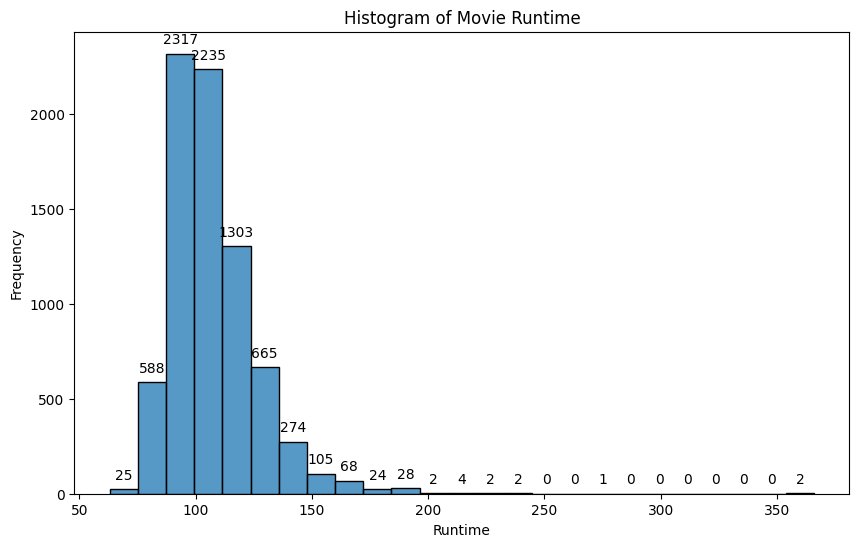

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="runtime", bins=25)
plt.xlabel("Runtime")
plt.ylabel("Frequency")
plt.title("Histogram of Movie Runtime")

# Adding annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Berdasarkan grafik di atas untuk runtime 90 an memiliki frekuensi terbanyak dan pada runtime di atas 250 an kebanyakan memiliki frekuensi 0

## Visualisasi Data Menggunakan Heatmap

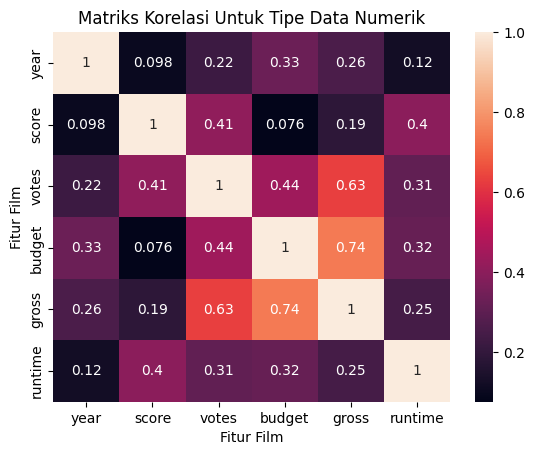

<Figure size 1000x800 with 0 Axes>

In [7]:
korelasi_matriks = df.corr(method ='pearson',numeric_only = True)

sns.heatmap(korelasi_matriks, annot = True)

plt.title("Matriks Korelasi Untuk Tipe Data Numerik")
plt.xlabel("Fitur Film")
plt.ylabel("Fitur Film")

plt.figure(figsize=(10, 8))  
plt.show()

Dapat dilihat dari heatmap di atas bahwa terdapat kurang korelasi antar variabel karena warna yang ditunjukkan tidak menunjukkan warna yang berdekatan

## Visualisasi Data Menggunakan Bar Plot

C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


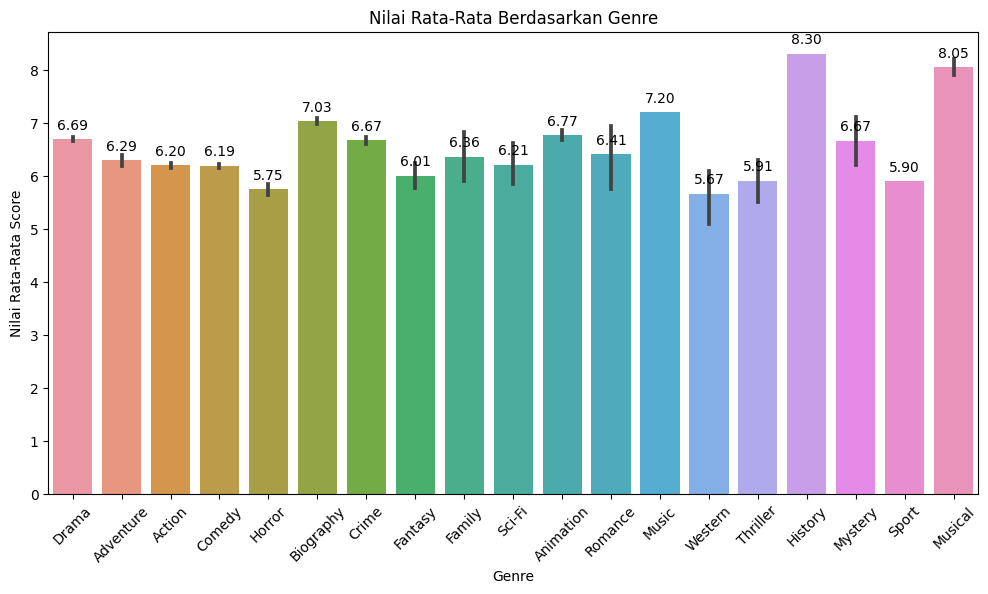

In [8]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="genre", y="score")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Nilai Rata-Rata Score")
plt.title("Nilai Rata-Rata Berdasarkan Genre")

# Menambahkan anotasi di atas bar plot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Melalui bar plot di atas genre musical memiliki nilai rata-rata score tertinggi dan western memiliki rata-rata score terendah

## Visualisasi Data Menggunakan Pie Chart

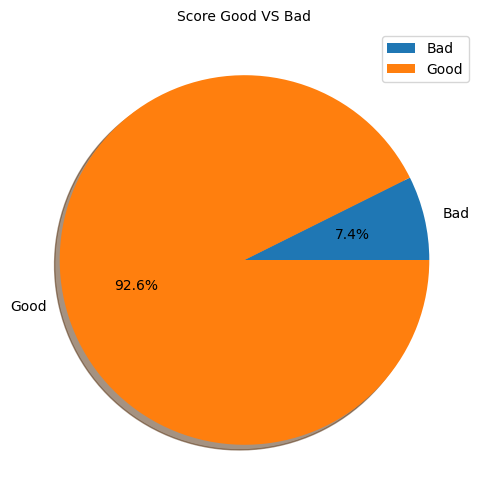

In [9]:
data = [df.score[df['score']<5].count(), df.score[df['score']>=5].count()]
label = ['Bad', 'Good']

figure, axes = plt.subplots(figsize=(8, 6))
axes.pie(data, 
         labels=label, 
         autopct='%.1f%%',
         shadow=True)

plt.title("Score Good VS Bad", size = 10)
plt.legend()
plt.show()

Dapat dilihat melalui pie chart diatas bahwa dominan good score dengan 92.7% dan bad score dengan 7.3%